In [1]:
import pandas as pd
import sklearn

import service
from clustering.KMeans import KMeans

### data_1

In [2]:
df = pd.read_csv('data/data_1.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x       10 non-null     int64 
 1   y       10 non-null     int64 
 2   label   10 non-null     object
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [3]:
X, labels = df.drop(columns='label'), df['label']
X.shape, labels.shape

((10, 2), (10,))

In [4]:
X = X[['x', 'y']].to_numpy()

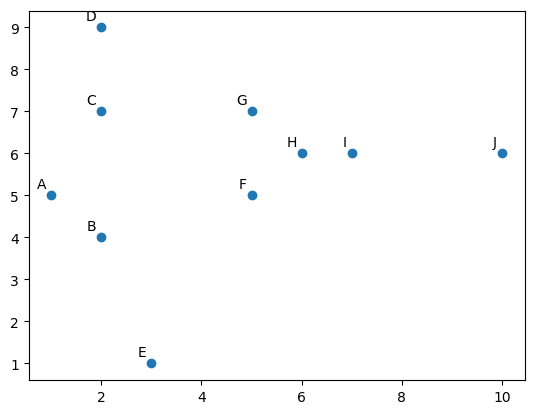

In [5]:
service.plot_raw_data(X, labels)

#### KMeans

In [6]:
n_clusters = 3
init = [[1, 5], [5, 5], [10, 6]]  # TODO

In [7]:
estimator = KMeans(
    n_clusters=n_clusters,
    init=init,
)
estimator.fit(X);

In [8]:
# service.plot_clusters(
#     X,
#     labels=labels,
#     cluster_labels=estimator.labels_,
#     cluster_centers=estimator.cluster_centers_,
# )

Compare with similar scikit-learn model

In [9]:
sk_estimator = sklearn.cluster.KMeans(
    n_clusters=n_clusters,
    init=init,
    verbose=1,
    random_state=42,
)
sk_estimator.fit(X);

Initialization complete
Iteration 0, inertia 55.0.
Iteration 1, inertia 43.55.
Converged at iteration 1: strict convergence.


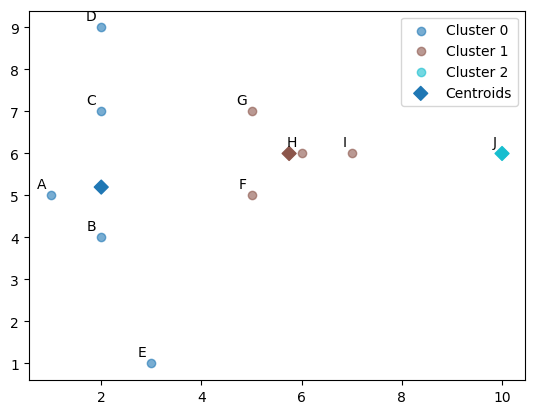

In [10]:
service.plot_clusters(
    X,
    labels=labels,
    cluster_labels=sk_estimator.labels_,
    cluster_centers=sk_estimator.cluster_centers_,
)